In [123]:
#import libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
import numpy  as np
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize

In [100]:
# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv("Z:/housing.csv", header=None, delimiter=r"\s+", names=column_names)

# Display the first 6 rows
print(boston.head(6))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
5     18.7  394.12   5.21  28.7  


In [101]:
#check number of row and column
print(f"Number of rows (records): {boston.shape[0]}")
print(f"Number of columns (variables): {boston.shape[1]}")

Number of rows (records): 506
Number of columns (variables): 14


"MEDV" is dependent variables. There are 13 (=14-1) predictors.

In [102]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

All variables are numeric.

In [103]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No missing values

# Data exploratory and feature selection

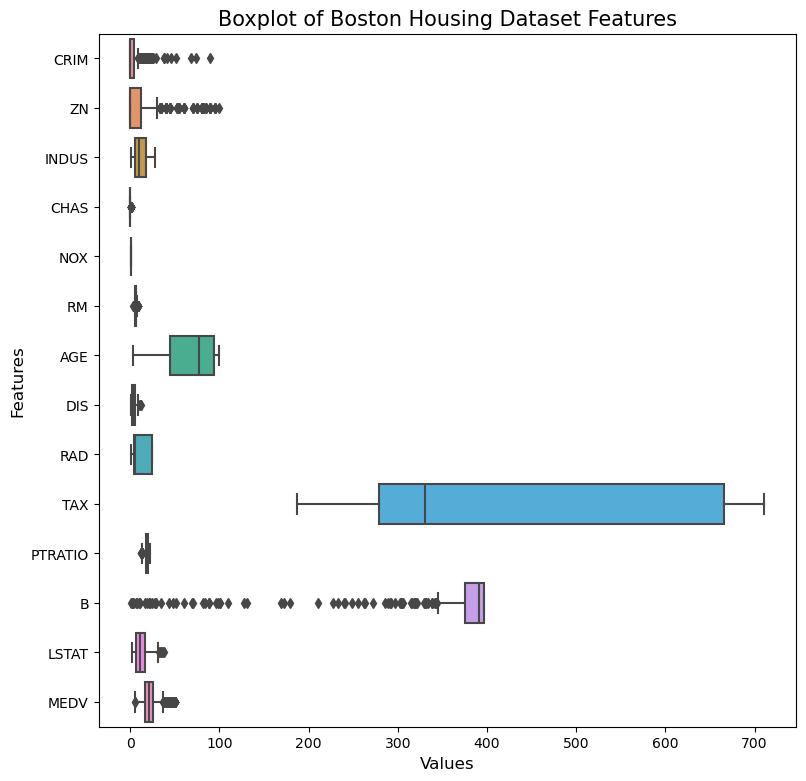

In [104]:

plt.figure(figsize=(9,9))
sns.boxplot(data=boston, orient='h')
plt.title('Boxplot of Boston Housing Dataset Features', fontsize=15)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()


It was difficult to track every variable in a single plot because each variable's range varied greatly.

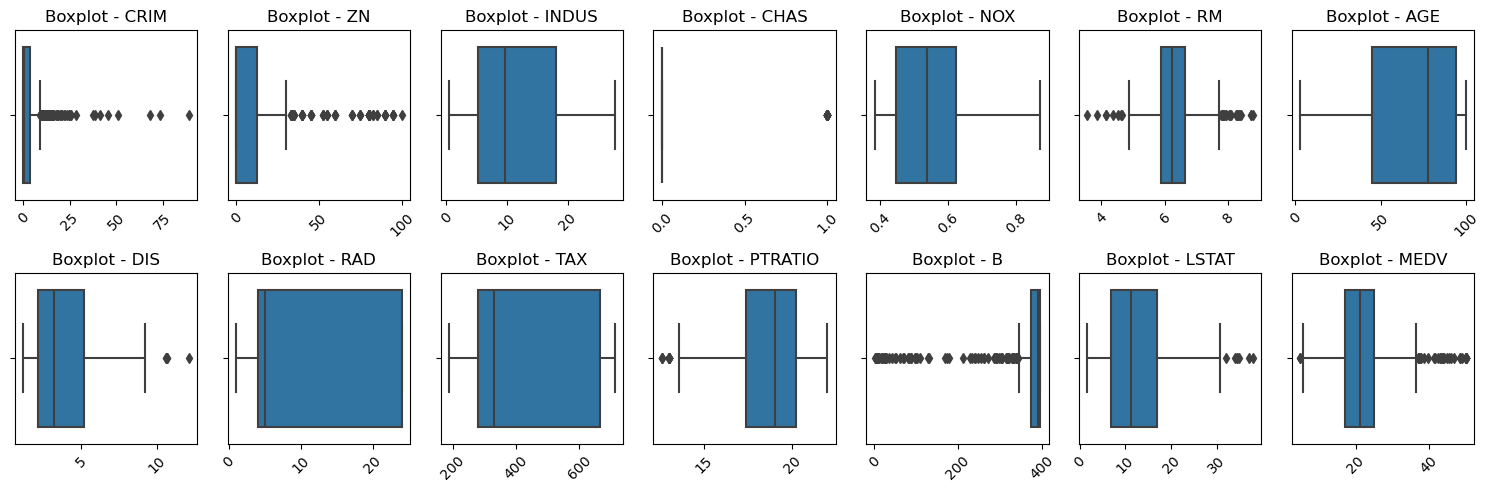

In [105]:
# Setting up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15, 5))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plotting box plots for each feature
for i, col in enumerate(boston.columns):
    sns.boxplot(x=boston[col], ax=axes[i])
    axes[i].set_title(f'Boxplot - {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=45)
    
# Adjust layout - prevously xticks of previous rows and title of next rows were overlappingm, added padding
plt.tight_layout(pad=1.0, h_pad=1.0, w_pad=1.0) 
plt.show()


For the predictor variables CRIM, ZN, RM, and B, there are more outliers. In addition, there are less outliers in  DIS, PTRATIO, and LSTAT. It seems 'CHAS' has majority of single value.

In [106]:
# Checking unique values in 'CHAS'
np.unique(boston['CHAS'], return_counts=True)

(array([0, 1], dtype=int64), array([471,  35], dtype=int64))

93% of data has 0 value for 'CHAS' .  This variable can be removed based on variance threshold

In [107]:
# Compute variance for each feature
variances = boston.var()

print("Variances of all features:")
print(variances)

Variances of all features:
CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
dtype: float64


The zero-variance (<0.1) features - "CHAS"and "NOX"  can be removed. They will be contribute less into prediction as they have same values for most of the records/samples.

In [273]:
# Removing "CHAS", "NOX" and "RM" varibles, also split the data  into independent variable and predictors. 

X = boston.drop(["CHAS", "NOX"], axis=1)
#y = boston['MEDV']

In [274]:
X

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [277]:
corr_matrix = X.corr()

print (corr_matrix)

             CRIM        ZN     INDUS        RM       AGE       DIS       RAD  \
CRIM     1.000000 -0.200469  0.406583 -0.219247  0.352734 -0.379670  0.625505   
ZN      -0.200469  1.000000 -0.533828  0.311991 -0.569537  0.664408 -0.311948   
INDUS    0.406583 -0.533828  1.000000 -0.391676  0.644779 -0.708027  0.595129   
RM      -0.219247  0.311991 -0.391676  1.000000 -0.240265  0.205246 -0.209847   
AGE      0.352734 -0.569537  0.644779 -0.240265  1.000000 -0.747881  0.456022   
DIS     -0.379670  0.664408 -0.708027  0.205246 -0.747881  1.000000 -0.494588   
RAD      0.625505 -0.311948  0.595129 -0.209847  0.456022 -0.494588  1.000000   
TAX      0.582764 -0.314563  0.720760 -0.292048  0.506456 -0.534432  0.910228   
PTRATIO  0.289946 -0.391679  0.383248 -0.355501  0.261515 -0.232471  0.464741   
B       -0.385064  0.175520 -0.356977  0.128069 -0.273534  0.291512 -0.444413   
LSTAT    0.455621 -0.412995  0.603800 -0.613808  0.602339 -0.496996  0.488676   
MEDV    -0.388305  0.360445 

In [276]:
# Filter to highlight values greater than 0.9
high_corr = corr_matrix[abs(corr_matrix) > 0.8]

# Create a mask to hide the upper triangle (redundant information)
mask = high_corr.isnull()
print(high_corr)

         CRIM   ZN  INDUS   RM  AGE  DIS       RAD       TAX  PTRATIO    B  \
CRIM      1.0  NaN    NaN  NaN  NaN  NaN       NaN       NaN      NaN  NaN   
ZN        NaN  1.0    NaN  NaN  NaN  NaN       NaN       NaN      NaN  NaN   
INDUS     NaN  NaN    1.0  NaN  NaN  NaN       NaN       NaN      NaN  NaN   
RM        NaN  NaN    NaN  1.0  NaN  NaN       NaN       NaN      NaN  NaN   
AGE       NaN  NaN    NaN  NaN  1.0  NaN       NaN       NaN      NaN  NaN   
DIS       NaN  NaN    NaN  NaN  NaN  1.0       NaN       NaN      NaN  NaN   
RAD       NaN  NaN    NaN  NaN  NaN  NaN  1.000000  0.910228      NaN  NaN   
TAX       NaN  NaN    NaN  NaN  NaN  NaN  0.910228  1.000000      NaN  NaN   
PTRATIO   NaN  NaN    NaN  NaN  NaN  NaN       NaN       NaN      1.0  NaN   
B         NaN  NaN    NaN  NaN  NaN  NaN       NaN       NaN      NaN  1.0   
LSTAT     NaN  NaN    NaN  NaN  NaN  NaN       NaN       NaN      NaN  NaN   
MEDV      NaN  NaN    NaN  NaN  NaN  NaN       NaN       NaN    

# Plotting correlation heatmap
plt.figure(figsize=(20, 10))

sns.heatmap(X.corr().abs(),  annot=True)

RAD (index of accessibility to radial highways) and TAX (full-value property-tax rate per $10,000) are highly correlated with each other (r=0.91). 

'RAD" variable measures the index of accessibility to radial highways for each of the housing tracts in the dataset. It represents the convenience and ease of accessing radial highways from different locations within the city of Boston. Thus, it is  more directly related to housing prices, than TAX. Removing TAX variable.

So, total 10 predictor left .

# Test -train split 

In [159]:
X = boston.drop(["CHAS", "NOX","TAX",'MEDV'], axis=1)
y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [160]:
# Print the shapes of train and test set
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (404, 10)
X_test shape: (102, 10)
y_train shape: (404,)
y_test shape: (102,)


## Handle outliers in X_train

In [161]:
# number of outliers in each varieble

def count_outliers (data):
    cols = list(data)
    outliers = pd.DataFrame(columns=['Variables', 'Number of Outliers'])
    for column in cols:
        if column in data.select_dtypes(include=np.number).columns:
            q1 = X_train[column].quantile(0.25)
            q3 = X_train[column].quantile(0.75)
            iqr = q3 - q1
            lower_limit = q1 - (1.5*iqr)
            upper_limit = q3 + (1.5*iqr)
            outliers = pd.concat([outliers, pd.DataFrame({'Variables': [column], 'Number of Outliers':
                                                      [data.loc[(X_train[column] < lower_limit) | (data[column] > upper_limit)].shape[0]]})], ignore_index=True)
    print(outliers)

count_outliers(X_train)

  Variables Number of Outliers
0      CRIM                 53
1        ZN                 52
2     INDUS                  0
3        RM                 24
4       AGE                  0
5       DIS                  4
6       RAD                  0
7   PTRATIO                  3
8         B                 60
9     LSTAT                  5


Winsorizing is a statistical technique used to limit extreme values in data to reduce the effect of possibly spurious outliers. By replacing the extreme values with less extreme ones. Winsorizing helps to make the data more robust and less sensitive to outliers. 


In [167]:
# Function to Winsorize
def winsorize (series, limits):
    lower_limit = series.quantile(limits[0])
    upper_limit = series.quantile(1 - limits[1])
    return np.clip(series, lower_limit, upper_limit)

In [168]:
# defining winsorize limit which is 0.05 - that means outlier below 5th percentile and above 95 percentile will be updated.
limits = [0.05, 0.05]

# Apply Winsorizing to each column in the training set
for col in X_train.columns:
    X_train[col] = winsorize (X_train[col], limits)


In [169]:
# Look at updated dataset
count_outliers(X_train)

  Variables Number of Outliers
0      CRIM                 53
1        ZN                 52
2     INDUS                  0
3        RM                  0
4       AGE                  0
5       DIS                  0
6       RAD                  0
7   PTRATIO                  0
8         B                 60
9     LSTAT                  0


The RM, DIS, PTRATIO, and LSTAT outliers were modified so that they fell inside the upper bound. However, outlier from CRIM, B and ZN variables did not change by count.

Text(0.5, 1.0, 'Winsorized CRIM Feature')

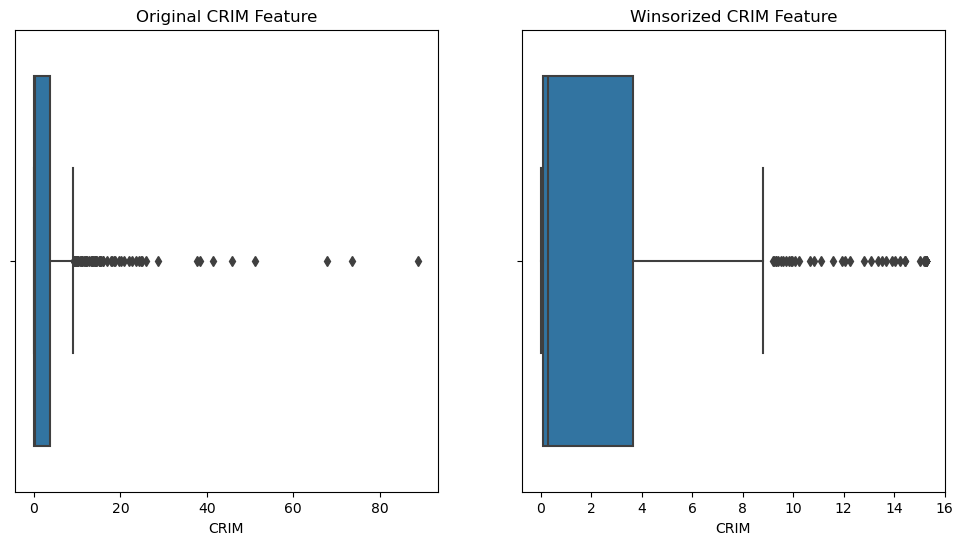

In [173]:
#Plotting originl 'CRIM' and winsorized 'CRIM' variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=boston['CRIM'])
plt.title(f'Original {feature} Feature')

plt.subplot(1, 2, 2)
sns.boxplot(x=X_train['CRIM'])
plt.title(f'Winsorized {feature} Feature')

The data distribution of 'CRIM' changed after winsorizing, despite the fact that the number of outliers remained unchanged.

C:\Users\adut446\AppData\Local\Temp\ipykernel_22124\374838039.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\adut446\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adut446\AppData\Local\Temp\ipykernel_22124\374838039.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar fle

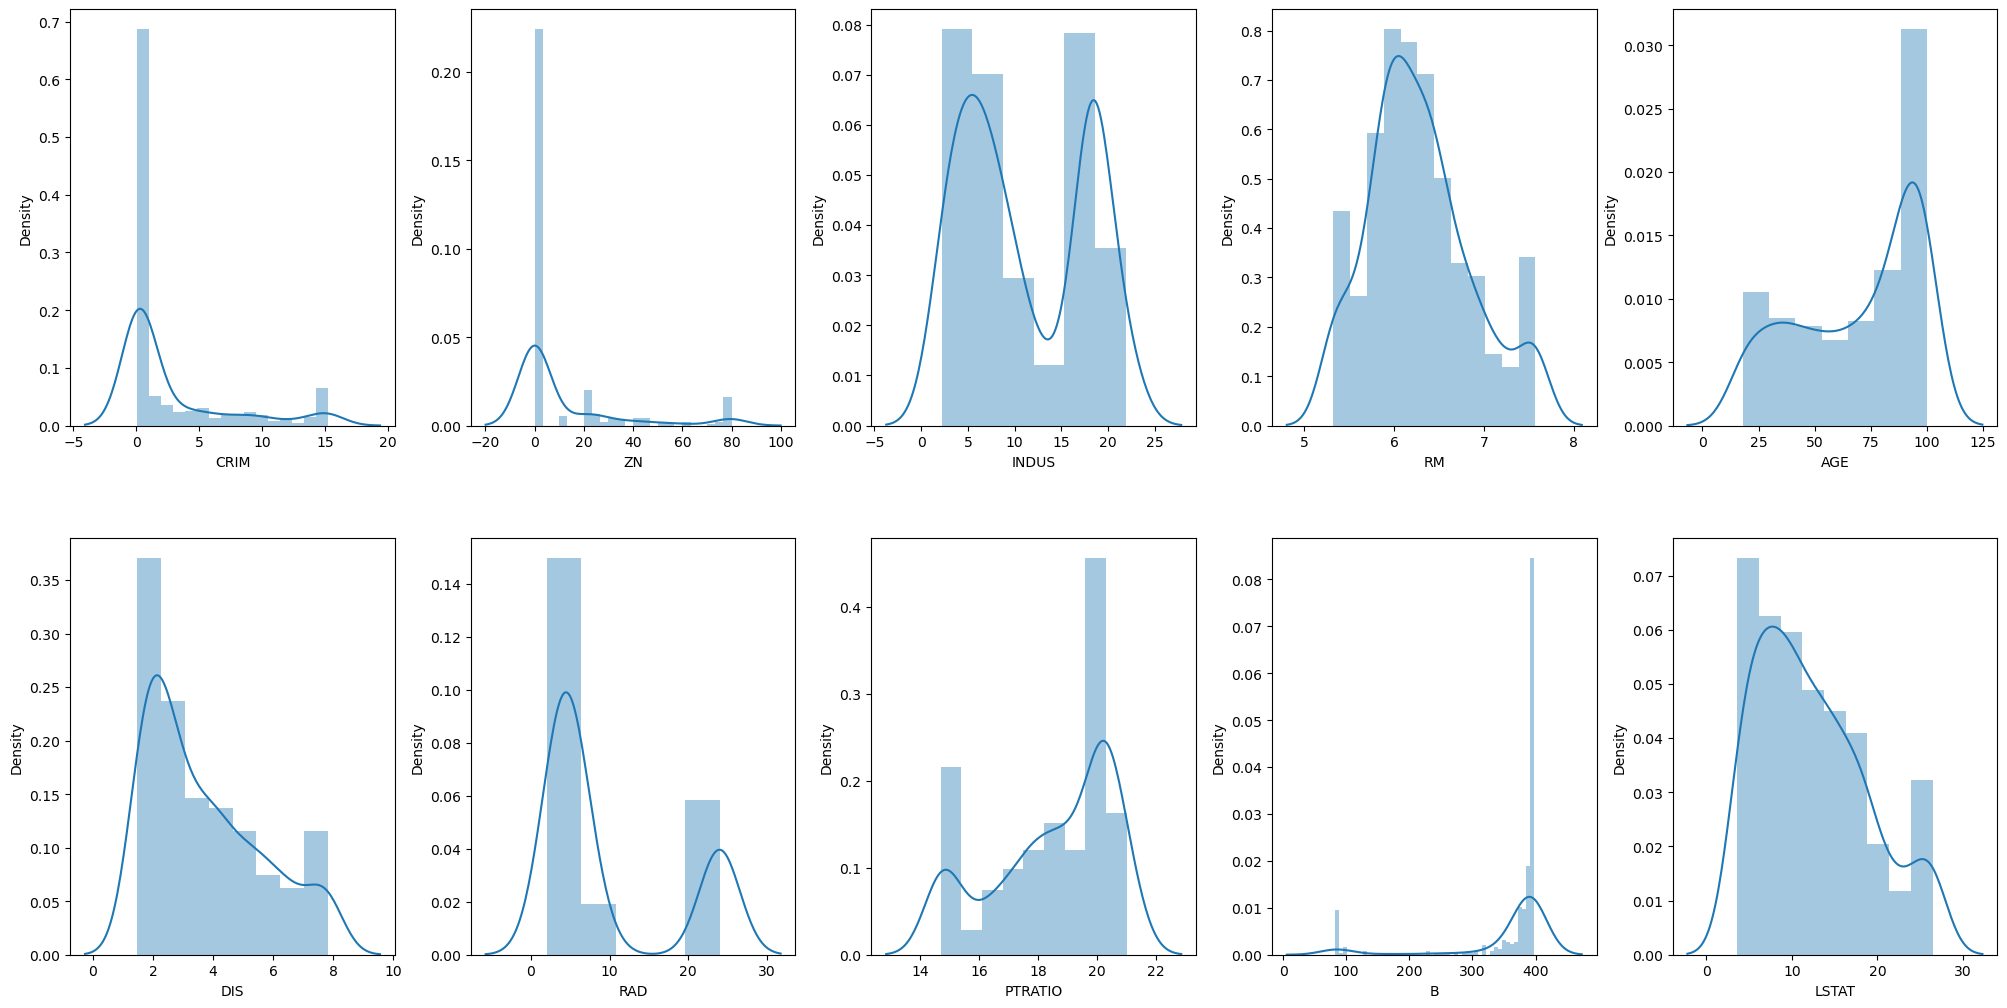

In [175]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in X_train.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Regression models

In [267]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, max_error
from sklearn.model_selection import cross_val_score

In [182]:
# Standardize the data using RobustScaler; Unlike the previous scalers, 
#the centering and scaling statistics of RobustScaler are based on percentiles and are therefore not 
#influenced by a small number of very large marginal outliers.

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\adut446\AppData\Local\Temp\ipykernel_22124\760196422.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\adut446\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adut446\AppData\Local\Temp\ipykernel_22124\760196422.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar fle

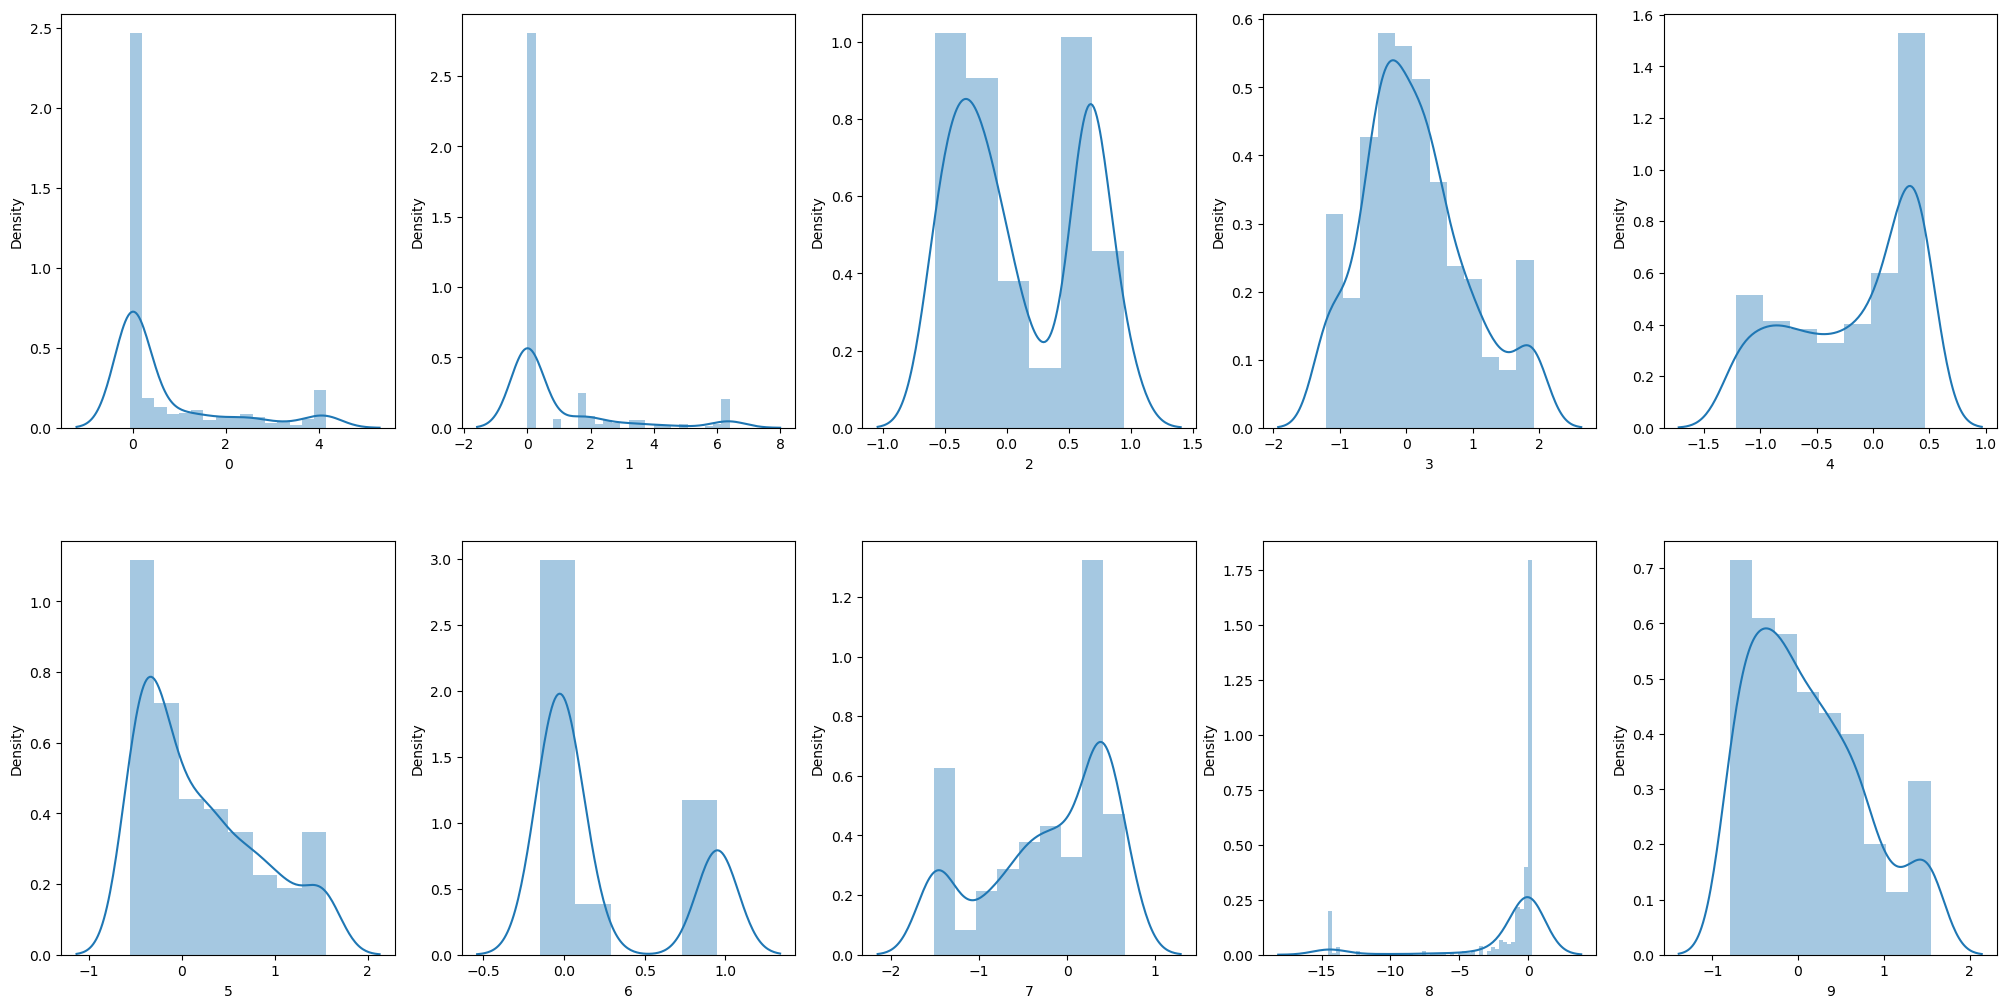

In [183]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in pd.DataFrame(X_train_scaled).items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#Test
scaler =StandardScaler()
X_train_scaled_ss = scaler.fit_transform(X_train)

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in pd.DataFrame(X_train_scaled_ss ).items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [216]:
## Parameter search and feature selection using Random Forest

pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_regression)),
     ('model',RandomForestRegressor(random_state = 0))
    ]
)

scoring = {
    'Negative mean_squared_error': 'neg_mean_squared_error',
    'r2_score': 'r2'}


search = GridSearchCV(
    estimator = pipeline,
    param_grid = {
  'selector__k':[3,4,5,6,7,8,9,10] , 
  'model__n_estimators':np.arange(10,1000,100),
 'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
 },
    n_jobs=-1,
    scoring=scoring,
    cv=5,
    verbose=3,
    refit= 'Negative mean_squared_error',
    return_train_score=True,
   
)


search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selector',
                                        SelectKBest(score_func=<function f_regression at 0x0000027905673DC0>)),
                                       ('model',
                                        RandomForestRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910]),
                         'selector__k': [3, 4, 5, 6, 7, 8, 9, 10]},
             refit='Negative mean_squared_error', return_train_score=True,
             scoring={'Negative mean_squared_error': 'neg_mean_squared_error',
                      'r2_score': 'r2'},
             verbose=3)

In [217]:
search.best_params_

{'model__max_depth': 20,
 'model__min_samples_split': 2,
 'model__n_estimators': 810,
 'selector__k': 10}

In [218]:
search.best_score_

-13.797514085212152

In [222]:
## Parameter search and feature selection using LinearRegression

pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_regression)),
     ('model',LinearRegression())
    ]
)

scoring = {
    'Negative mean_squared_error': 'neg_mean_squared_error',
    'r2_score': 'r2'}


search = GridSearchCV(
    estimator = pipeline,
    param_grid = {
  'selector__k':[3,4,5,6,7,8,9,10] , 
        'model__fit_intercept': [True, False]
 },
    n_jobs=-1,
    scoring=scoring,
    cv=5,
    verbose=3,
    refit= 'Negative mean_squared_error',
    return_train_score=True,
   
)


search.fit(X_train_scaled, y_train)
print(search.best_params_)
print(search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'model__fit_intercept': True, 'selector__k': 10}
-25.389807585425455


In [227]:
## Parameter search and feature selection using SVR


pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_regression)),
     ('model',SVR())
    ]
)

scoring = {
    'Negative mean_squared_error': 'neg_mean_squared_error',
    'r2_score': 'r2'}


search = GridSearchCV(
    estimator = pipeline,
    param_grid = {
  'selector__k':[3,4,5,6,7,8,9,10] ,
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__gamma': ['scale', 'auto'],
          'model__C': [0.1, 1, 10, 100]
        
 },
    n_jobs=-1,
    scoring=scoring,
    cv=5,
    verbose=3,
    refit= 'Negative mean_squared_error',
    return_train_score=True,
   
)


search.fit(X_train_scaled, y_train)
print(search.best_params_)
print(search.best_score_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
{'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'selector__k': 10}
-14.763502113810187


In [231]:
## Parameter search and feature selection using Gradient Boosting Regressor

pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_regression)),
     ('model', GradientBoostingRegressor())
    ]
)

scoring = {
    'Negative mean_squared_error': 'neg_mean_squared_error',
    'r2_score': 'r2'}


search = GridSearchCV(
    estimator = pipeline,
    param_grid = {
  'selector__k':[3,4,5,6,7,8,9,10] ,
            'model__n_estimators': [200, 600, 800, 1000],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2, 4],
    'model__subsample': [0.8, 1.0]
 },
    n_jobs=-1,
    scoring=scoring,
    cv=5,
    verbose=3,
    refit= 'Negative mean_squared_error',
    return_train_score=True,
   
)


search.fit(X_train_scaled, y_train)
print(search.best_params_)
print(search.best_score_)


Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
{'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 600, 'model__subsample': 0.8, 'selector__k': 10}
-11.916358879549565


# Model training and evaluation 

In [246]:
# train all models
# Initialize models
models = {
     'LinearRegression': LinearRegression(fit_intercept= True),
'RandomForestRegressor':RandomForestRegressor(random_state = 0, max_depth =20,min_samples_split= 2,n_estimators= 810),
'SVR':SVR(C= 100, gamma= 'scale', kernel= 'rbf'),
  'GradientBoostingRegressor': GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf= 2, 
                              min_samples_split= 2, 
                              n_estimators= 600, subsample= 0.8)}

In [269]:
# Fit and evaluate each model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
df_train=pd.DataFrame(columns=['Model', 'MSE' , 'R-squared',  'Max_error'])

df_test=pd.DataFrame(columns=['Model', 'MSE' , 'R-squared',  'Max_error'])


for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    
     # Evaluate performance
    y_train_pred  = model.predict(X_train_scaled)
    mse = mean_squared_error(y_train,  y_train_pred )
    r2 = r2_score(y_train,  y_train_pred)
    max_error=metrics.max_error(y_train,  y_train_pred) 
    
     # Store results
    new_row = {'Model': name, 'MSE': mse, 'R-squared': r2, 'Max_error':  max_error}
      
    # Append to DataFrame
    df_train = pd.concat([df_train, pd.DataFrame([new_row])], ignore_index=True)
    
    
    
    ################ testset ############    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    max_error=metrics.max_error(y_test, y_pred) 
    
    # Store results
    new_row_test = {'Model': name, 'MSE': mse, 'R-squared': r2, 'Max_error':  max_error}
      
    # Append to DataFrame
    df_test = pd.concat([df_test, pd.DataFrame([new_row_test])], ignore_index=True)

    
print("Training Set Results:")
print(df_train)
print("\nTest Set Results:")
print(df_test)


C:\Users\adut446\AppData\Local\Temp\ipykernel_22124\1776993365.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_train = pd.concat([df_train, pd.DataFrame([new_row])], ignore_index=True)
C:\Users\adut446\AppData\Local\Temp\ipykernel_22124\1776993365.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test = pd.concat([df_test, pd.DataFrame([new_row_test])], ignore_index=True)


Training Set Results:
                       Model        MSE  R-squared  Max_error
0           LinearRegression  22.783516   0.737934  26.614562
1      RandomForestRegressor   1.491644   0.982842   7.181852
2                        SVR   9.711677   0.888292  24.279321
3  GradientBoostingRegressor   0.355348   0.995913   2.047512

Test Set Results:
                       Model        MSE  R-squared  Max_error
0           LinearRegression  31.517773   0.574625  19.969912
1      RandomForestRegressor  17.642489   0.761891  24.626173
2                        SVR  31.640057   0.572975  32.418804
3  GradientBoostingRegressor  17.000966   0.770549  25.167790


In [262]:
# Feature importance

feature_names = X_train.columns
gb_model= GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf= 2, 
                              min_samples_split= 2, 
                              n_estimators= 600, subsample= 0.8)
# Fit the model
gb_model.fit(X_train_scaled, y_train)
# Get feature importances
feature_importance_gb = gb_model.feature_importances_

# Create a dataframe to display feature importances
importance_df_gb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_gb
})

# Sort features by importance
importance_df_gb = importance_df_gb.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print("Feature Importance from GradientBoostingRegressor:")
print(importance_df_gb)



Feature Importance from GradientBoostingRegressor:
   Feature  Importance
9    LSTAT    0.468865
3       RM    0.336351
5      DIS    0.064176
0     CRIM    0.056646
7  PTRATIO    0.024328
4      AGE    0.021884
8        B    0.017393
2    INDUS    0.007473
6      RAD    0.002053
1       ZN    0.000830


<Figure size 1000x800 with 0 Axes>

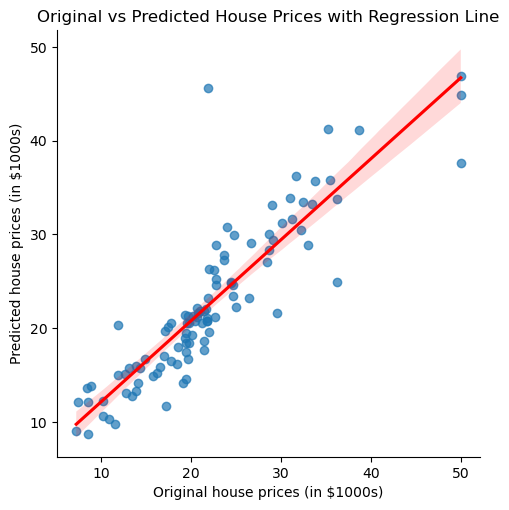

In [271]:
# Create a DataFrame for plotting

y_pred = gb_model.predict(X_test_scaled)
plot_data = pd.DataFrame({
    'Original': y_test,
    'Predicted': y_pred
})

# Plotting original vs predicted values with regression line
plt.figure(figsize=(10, 8))
sns.lmplot(x='Original', y='Predicted', data=plot_data, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.7})
plt.title('Original vs Predicted House Prices with Regression Line')
plt.xlabel('Original house prices (in $1000s)')
plt.ylabel('Predicted house prices (in $1000s)')
plt.show()

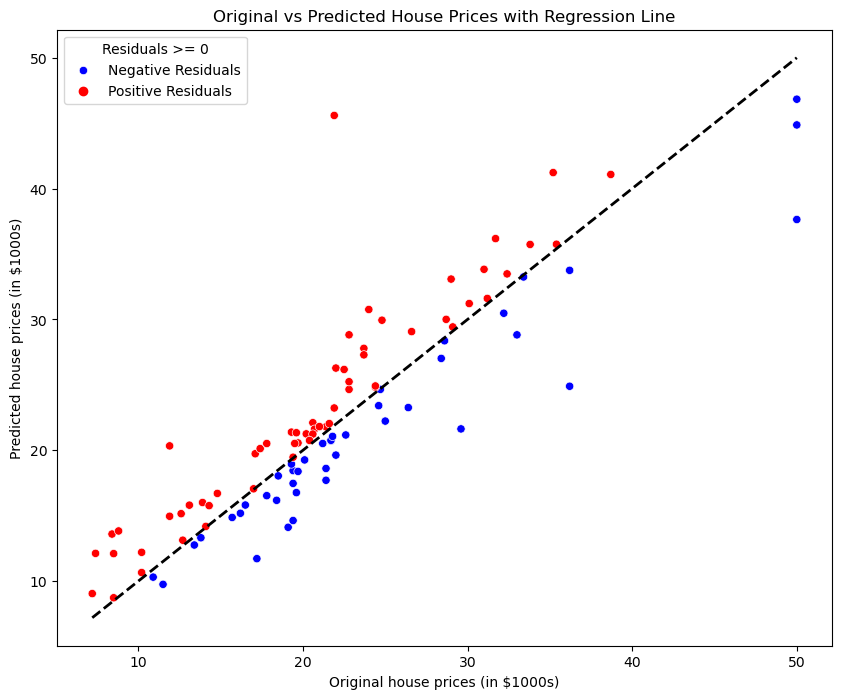

In [272]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Original': y_test,
    'Predicted': y_pred
})

# Calculate residuals (difference between original and predicted values)
plot_data['Residuals'] = plot_data['Original'] - plot_data['Predicted']

# Plotting original vs predicted values with different colors for positive and negative residuals
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Original', y='Predicted', data=plot_data, hue=plot_data['Residuals'] >= 0, palette=['red', 'blue'])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the 45-degree line
plt.title('Original vs Predicted House Prices with Regression Line')
plt.xlabel('Original house prices (in $1000s)')
plt.ylabel('Predicted house prices (in $1000s)')
plt.legend(title='Residuals >= 0', loc='upper left', labels=['Negative Residuals', 'Positive Residuals'])
plt.show()

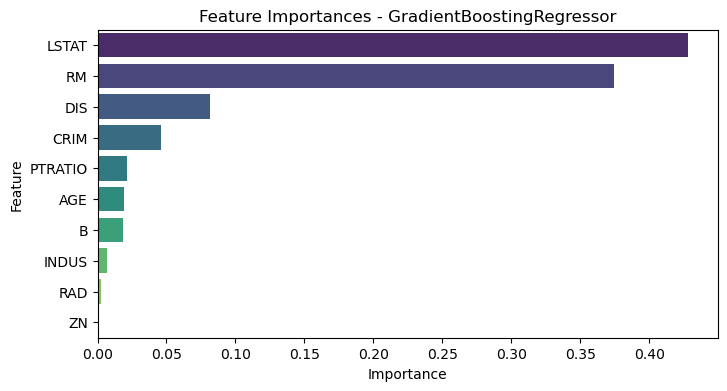

In [261]:
# Plotting feature importances
plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb, palette='viridis')
plt.title('Feature Importances - GradientBoostingRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [254]:
feature_names = X_train.columns
rf_model= RandomForestRegressor(random_state = 0, max_depth =20,min_samples_split= 2,n_estimators= 810)
# Fit the model
rf_model.fit(X_train_scaled, y_train)
# Get feature importances
feature_importance_rf = rf_model.feature_importances_

# Create a dataframe to display feature importances
importance_df_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_rf
})

# Sort features by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print("Feature Importance from GradientBoostingRegressor:")
print(importance_df_rf)


Feature Importance from GradientBoostingRegressor:
   Feature  Importance
9    LSTAT    0.443764
3       RM    0.395725
5      DIS    0.062308
0     CRIM    0.040301
4      AGE    0.017773
8        B    0.014079
7  PTRATIO    0.013957
2    INDUS    0.007385
6      RAD    0.003668
1       ZN    0.001041
